In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import math
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import sklearn
from time import time
from sklearn.metrics import r2_score
import os
from sklearn.preprocessing import scale
#from scipy import stats
from statsmodels.stats import weightstats as mm
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})



In [19]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.describe(include=[np.number])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df.isnull().sum()  #Data not having any NaNs

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

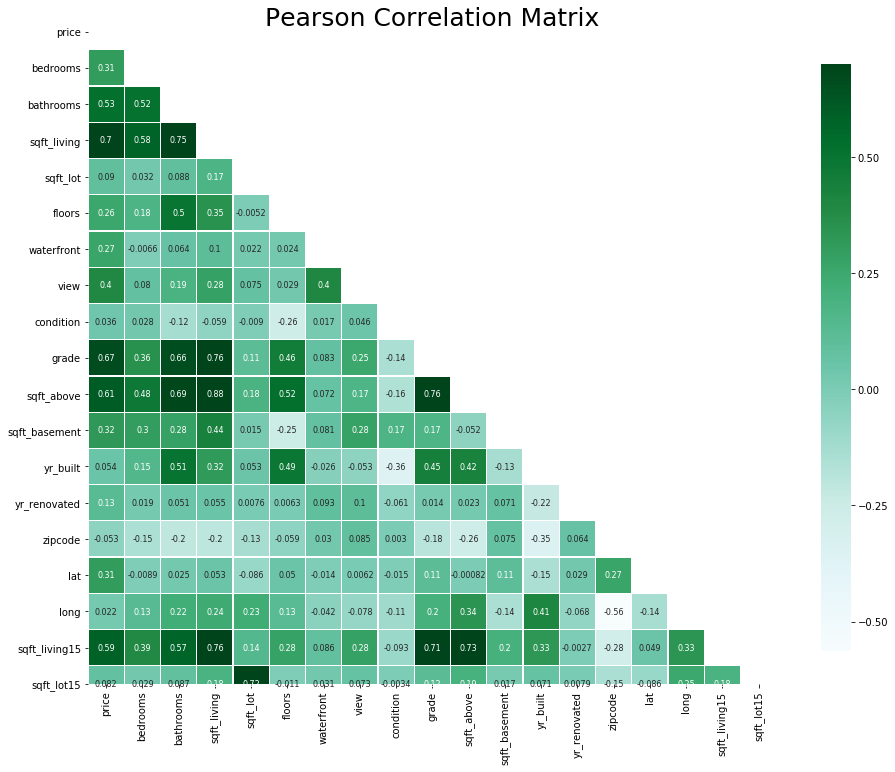

In [20]:
data=df
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

mask = np.zeros_like(data[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(data[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

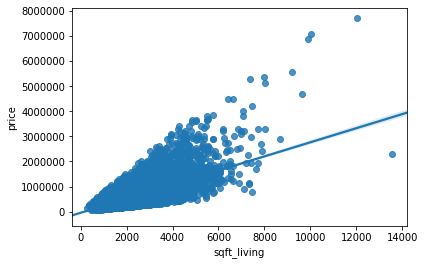

In [6]:
sns.regplot(x='sqft_living',y='price',data=data)

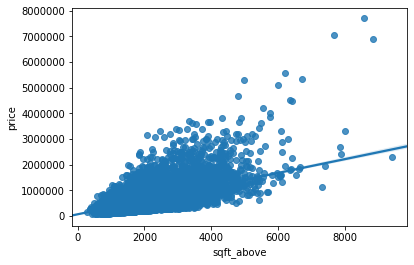

In [7]:
sns.regplot(x='sqft_above',y='price',data=data)

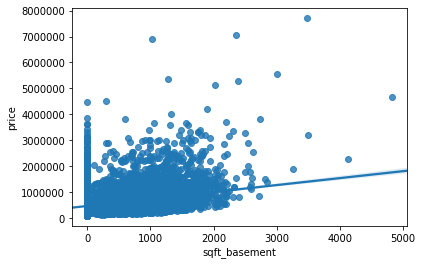

In [8]:
sns.regplot(x='sqft_basement',y='price',data=data)

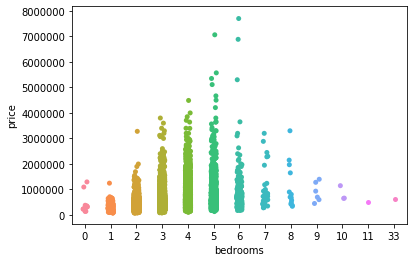

In [9]:
sns.stripplot(x='bedrooms', y='price',data=data)

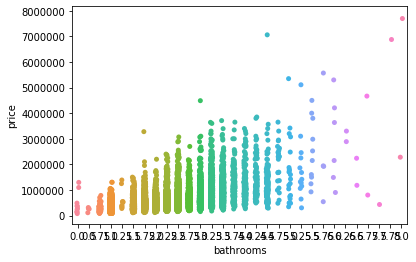

In [10]:
sns.stripplot(x='bathrooms', y='price',data=data)

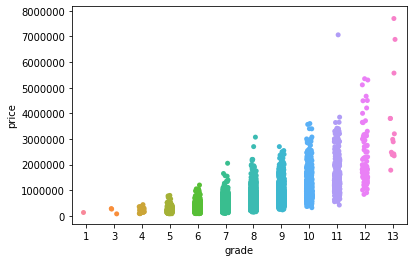

In [11]:
sns.stripplot(x='grade', y='price',data=data, size=5)

In [12]:
# find the row of the house which has the highest price
maxpr=data.loc[data['price'].idxmax()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_copy = data.copy()
# select a zipcode for the heatmap
#set(df['zipcode'])
#df_copy = df[df['zipcode']==98001].copy()
df_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

In [13]:
c=['bedrooms','bathrooms','sqft_living','sqft_above','grade']
df=data[c]

In [14]:
df=pd.get_dummies(df,columns=['grade'], drop_first=True)

In [15]:
y=data['price']

In [16]:
x_train,y_train=train_test_split(data,train_size=0.8,random_state=42)

In [17]:
x_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6325,5467910190,20140527T000000,325000.0,3,1.75,1780,13095,1.0,0,0,...,9,1780,0,1983,0,98042,47.3670,-122.152,2750,13095
13473,9331800580,20150310T000000,257000.0,2,1.00,1000,3700,1.0,0,0,...,6,800,200,1929,0,98118,47.5520,-122.290,1270,5000
17614,2407000405,20150226T000000,228500.0,3,1.00,1080,7486,1.5,0,0,...,6,990,90,1942,0,98146,47.4838,-122.335,1170,7800
16970,5466700290,20150108T000000,288000.0,3,2.25,2090,7500,1.0,0,0,...,7,1280,810,1977,0,98031,47.3951,-122.172,1800,7350
20868,3026059361,20150417T000000,479000.0,2,2.50,1741,1439,2.0,0,0,...,8,1446,295,2007,0,98034,47.7043,-122.209,2090,10454


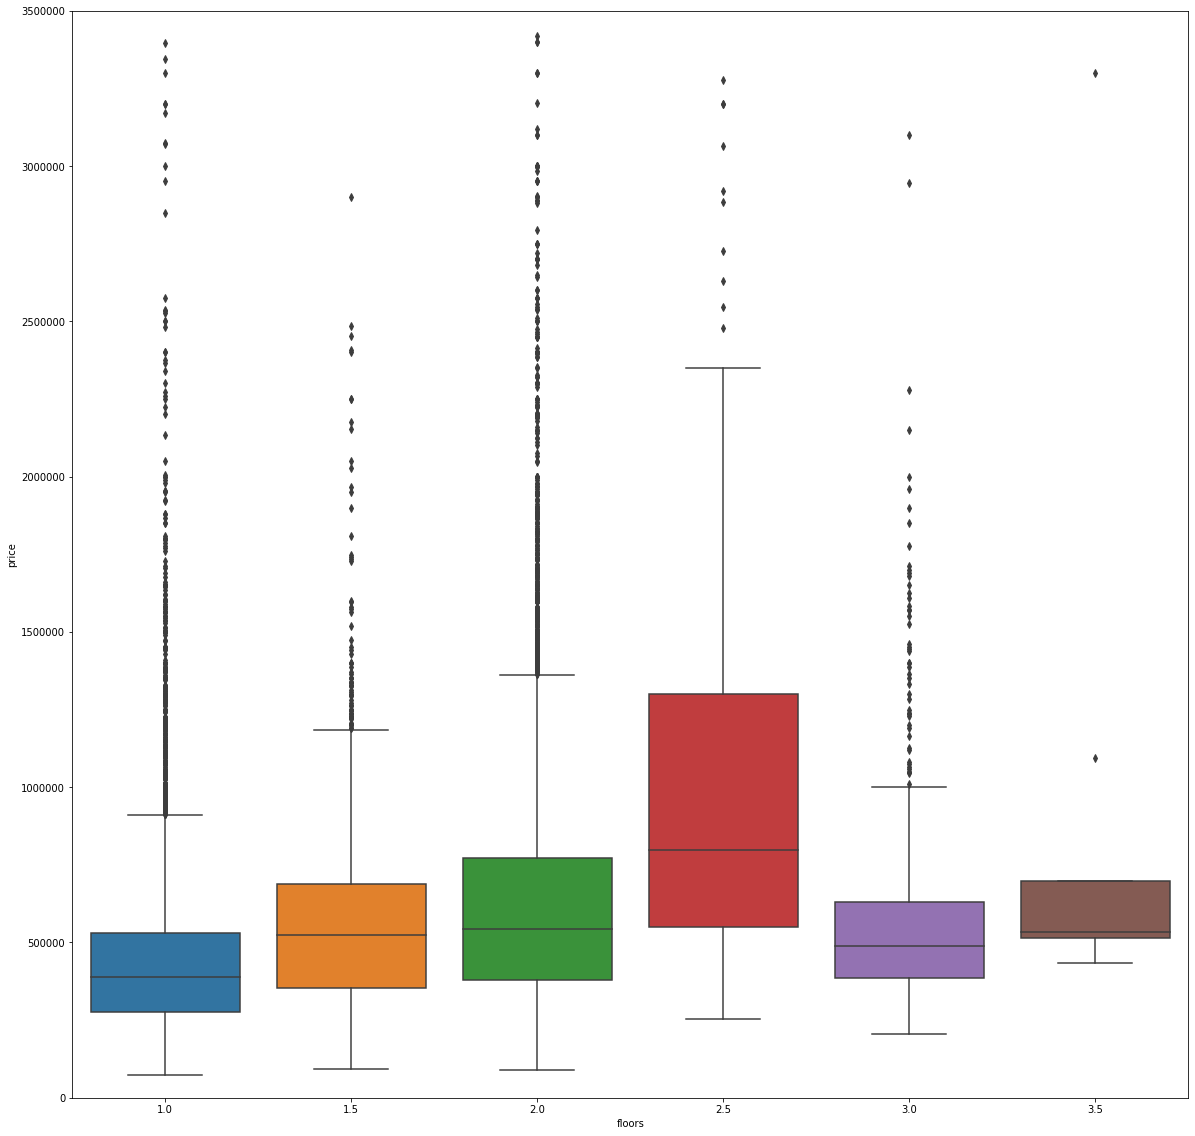

In [21]:
var = 'floors'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 20))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=3500000);

In [22]:
df = pd.read_csv('kc_house_data.csv')
data=df
train_data,test_data = train_test_split(data,train_size = 0.8,random_state=3)

lr = linear_model.LinearRegression()
x_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['price'], dtype=pd.Series)
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

Intercept: -47235.811302901246
Coefficient: [282.2468152]


In [24]:
x_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['price'], dtype=pd.Series)
pred0 = lr.predict(x_test)
rmsesm = float(format(np.sqrt(sklearn.metrics.mean_squared_error(y_test,pred0)),'.3f'))
rtrsm = float(format(lr.score(x_train, y_train),'.3f'))
rtesm = float(format(lr.score(x_test, y_test),'.3f'))
cv = float(format(cross_val_score(lr,data[['sqft_living']],data['price'],cv=5).mean(),'.3f'))
print('Root Mean Square Error:',rmsesm)

Root Mean Square Error: 254289.149


In [25]:
x_test1 = np.squeeze(np.asarray(x_test))
y_test1= np.squeeze(np.asarray(y_test))
x_train1 = np.squeeze(np.asarray(x_train))
y_train1= np.squeeze(np.asarray(y_train))

In [26]:
lr.score(x_test,y_test)

0.4962393622495711

In [27]:
n=len(data["sqft_living"])
mean=data["sqft_living"].mean()
sd=data["sqft_living"].std()
(n,mean,sd)

(21613, 2079.8997362698374, 918.4408970468115)

In [28]:
ztest,pvals=mm.ztest(data["sqft_living"],value=2060,alternative="larger")
#value is the null hypothesis; larger is for alternate hypothesis: means prop > value.
print("p-value",pvals)

p-value 0.0007229597653426813


In [29]:
if pvals<=0.05:
    print("We reject null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

We reject null hypothesis.


In [30]:
print(data.shape)

(21613, 21)


In [31]:
from sklearn.ensemble import GradientBoostingRegressor
start = time()
est=GradientBoostingRegressor(n_estimators=400, max_depth=5, loss='ls',min_samples_split=2,learning_rate=0.1).fit(x_train, y_train)
end=time()
train_time_g=end-start
gradient=est.score(x_test,y_test)

pred1 = est.predict(x_test)
exp_est1 = sklearn.metrics.explained_variance_score(pred1,y_test)

In [32]:
print('Score: {}'.format(gradient))
print('Variance Score: {}'.format(exp_est1))
rmsesm = float(format(np.sqrt(sklearn.metrics.mean_squared_error(y_test,pred1)),'.3f'))
rtrsm = float(format(est.score(x_train, y_train),'.3f'))
rtesm = float(format(est.score(x_test, y_test),'.3f'))
cv = float(format(cross_val_score(est,data[['sqft_living']],data['price'],cv=5).mean(),'.3f'))
print(rmsesm)

Score: 0.4989739250182751
Variance Score: 0.17985393255981108
253598.031


In [33]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)
df_dm=df.copy()
df_dm.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [34]:
from sklearn.linear_model import Lasso

In [35]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
df = pd.read_csv('kc_house_data.csv')
data=df
train_data_dm,test_data_dm = train_test_split(data,train_size = 0.8,random_state=3)
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)
df_dm=df.copy()
df_dm.describe()
complex_model_L = linear_model.Lasso(alpha=1)
complex_model_L.fit(train_data_dm[features],train_data_dm['price'])

pred1 = complex_model_L.predict(test_data_dm[features])
rmsecm1 = float(format(np.sqrt(sklearn.metrics.mean_squared_error(test_data_dm['price'],pred1)),'.3f'))
rtrcm1 = float(format(complex_model_L.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm1 = float(format(adjustedR2(complex_model_L.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm1 = float(format(complex_model_L.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm1 = float(format(adjustedR2(complex_model_L.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(complex_model_L,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

complex_model_L = linear_model.Lasso(alpha=100)
complex_model_L.fit(train_data_dm[features],train_data_dm['price'])

pred2 = complex_model_L.predict(test_data_dm[features])
rmsecm2 = float(format(np.sqrt(sklearn.metrics.mean_squared_error(test_data_dm['price'],pred2)),'.3f'))
rtrcm2 = float(format(complex_model_L.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm2 = float(format(adjustedR2(complex_model_L.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm2 = float(format(complex_model_L.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm2 = float(format(adjustedR2(complex_model_L.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(complex_model_L,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

complex_model_L = linear_model.Lasso(alpha=1000)
complex_model_L.fit(train_data_dm[features],train_data_dm['price'])

pred3 = complex_model_L.predict(test_data_dm[features])
rmsecm3 = float(format(np.sqrt(sklearn.metrics.mean_squared_error(test_data_dm['price'],pred3)),'.3f'))
rtrcm3 = float(format(complex_model_L.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm3 = float(format(adjustedR2(complex_model_L.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm3 = float(format(complex_model_L.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm3 = float(format(adjustedR2(complex_model_L.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(complex_model_L,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Lasso Regression','alpha=1, all features',rmsecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1]
evaluation.loc[r+1] = ['Lasso Regression','alpha=100, all features',rmsecm2,rtrcm2,artrcm2,rtecm2,artecm2,cv2]
evaluation.loc[r+2] = ['Lasso Regression','alpha=1000, all features',rmsecm3,rtrcm3,artrcm3,rtecm3,artecm3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Lasso Regression,"alpha=1, all features",198682.216,0.674,0.673,0.692,0.691,0.674
1,Lasso Regression,"alpha=100, all features",198766.030,0.674,0.673,0.692,0.691,0.674
2,Lasso Regression,"alpha=1000, all features",200171.115,0.671,0.671,0.688,0.687,0.672


In [36]:
#MLR 1
train_data_dm,test_data_dm = train_test_split(data,train_size = 0.8,random_state=3)

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data_dm[features],train_data_dm['price'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred31 = complex_model_1.predict(test_data_dm[features])
print(pred31)
exp_est31 = sklearn.metrics.explained_variance_score(pred31,y_test)
print(exp_est31)
rmsesm = float(np.sqrt(metrics.mean_squared_error(y_test,pred31)))
print(rmsesm)
rmsecm = float(format(np.sqrt(sklearn.metrics.mean_squared_error(test_data_dm['price'],pred31)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data_dm[features],test_data['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: -57221293.13485957
Coefficients: [-5.68950279e+04  1.13310062e+04  3.18389287e+02 -2.90807628e-01
 -5.79609821e+03  5.84022824e+02]
[ 404978.52166363 1217083.86697586  861771.12563153 ...  703347.17032467
 1163000.55288662  388301.69901898]
0.11696770990910477
248514.0107416952


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Lasso Regression,"alpha=1, all features",198682.216,0.674,0.673,0.692,0.691,0.674
1,Lasso Regression,"alpha=100, all features",198766.030,0.674,0.673,0.692,0.691,0.674
2,Lasso Regression,"alpha=1000, all features",200171.115,0.671,0.671,0.688,0.687,0.672
3,Multiple Regression-1,selected features,248514.011,0.514,0.514,0.519,0.518,0.512


In [37]:
#MLR 2
train_data_dm,test_data_dm = train_test_split(data,train_size = 0.8,random_state=3)
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','view','grade','zipcode','sqft_living15','sqft_lot15']
complex_model_2 = linear_model.LinearRegression()
complex_model_2.fit(train_data_dm[features],train_data_dm['price'])

print('Intercept: {}'.format(complex_model_2.intercept_))
print('Coefficients: {}'.format(complex_model_2.coef_))

pred = complex_model_2.predict(test_data_dm[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_2.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_2.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_2.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_2.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_2,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-2','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: -46359512.00922489
Coefficients: [-3.30678568e+04 -9.00707302e+03  2.04778991e+02 -1.59232549e-02
 -3.22001688e+04  8.76425209e+04  9.43371735e+04  4.67974044e+02
  1.03224482e+01 -6.71143542e-01]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Lasso Regression,"alpha=1, all features",198682.216,0.674,0.673,0.692,0.691,0.674
1,Lasso Regression,"alpha=100, all features",198766.030,0.674,0.673,0.692,0.691,0.674
2,Lasso Regression,"alpha=1000, all features",200171.115,0.671,0.671,0.688,0.687,0.672
4,Multiple Regression-2,selected features,229257.119,0.585,0.584,0.591,0.590,0.583
3,Multiple Regression-1,selected features,248514.011,0.514,0.514,0.519,0.518,0.512


In [38]:
from sklearn.ensemble import GradientBoostingRegressor
gbm_model = GradientBoostingRegressor(max_depth=7,random_state=42)
gbm_model.fit(x_train, y_train)
y_pred = gbm_model.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(r2_score(y_test,y_pred))
y_tr_pred=gbm_model.predict(x_train)
print(r2_score(y_train,y_tr_pred))
print(r2_score(y_test,y_pred))
adjustedR2(r2_score(y_test,y_pred),df_dm.shape[0],df_dm.shape[1])

250853.07833462217
0.509761467035371
0.6228496005014323
0.509761467035371


0.5093073742853111

In [39]:
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],y_pred)),'.3f'))
rtrcm = float(format(complex_model_2.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_2.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_2.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_2.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_2,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Gradient-Boosting','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Lasso Regression,"alpha=1, all features",198682.216,0.674,0.673,0.692,0.691,0.674
1,Lasso Regression,"alpha=100, all features",198766.030,0.674,0.673,0.692,0.691,0.674
2,Lasso Regression,"alpha=1000, all features",200171.115,0.671,0.671,0.688,0.687,0.672
4,Multiple Regression-2,selected features,229257.119,0.585,0.584,0.591,0.590,0.583
5,Gradient-Boosting,selected features,250853.078,0.585,0.584,0.591,0.590,0.583
3,Multiple Regression-1,selected features,248514.011,0.514,0.514,0.519,0.518,0.512
